Context
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

Content
price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

In [1]:
%pwd

'c:\\Users\\hp\\Desktop\\Python Programs\\New folder\\Python Object and Data Structure Basics\\ML Projects with Live class\\Diamond_Price_Prediction\\Diamond_Prediction\\notebook'

In [2]:
!pip install pandas

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("gemstone.csv")
df.head(5)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [5]:
df.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [7]:
df.shape

(193573, 11)

In [8]:
df.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [9]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
#Seperating Numerical and categorical data
numerical = df.columns[df.dtypes != 'object']

In [12]:
numerical

Index(['id', 'carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [13]:
category = df.columns[df.dtypes == 'object']
category
                      

Index(['cut', 'color', 'clarity'], dtype='object')

In [14]:
df.describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [15]:
df.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [16]:
df['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [17]:
df['color'].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [18]:
df['clarity'].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

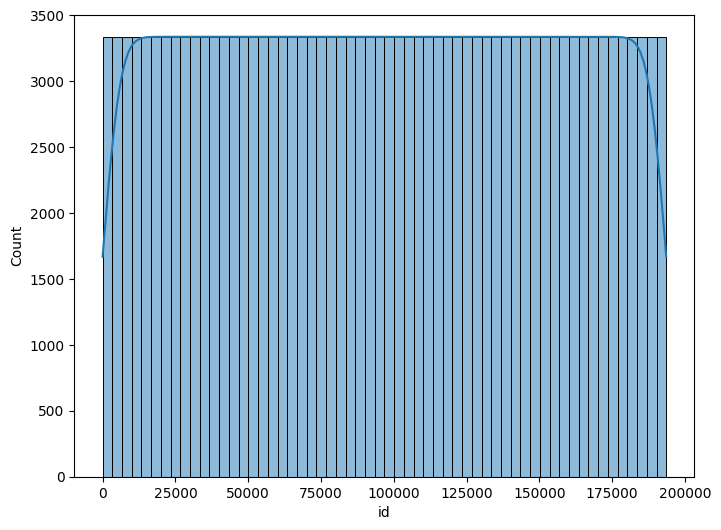

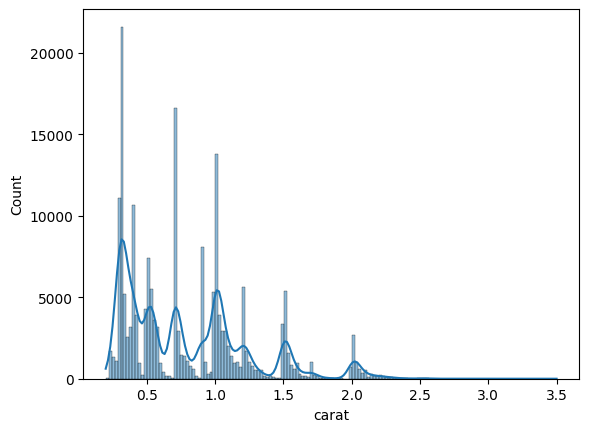

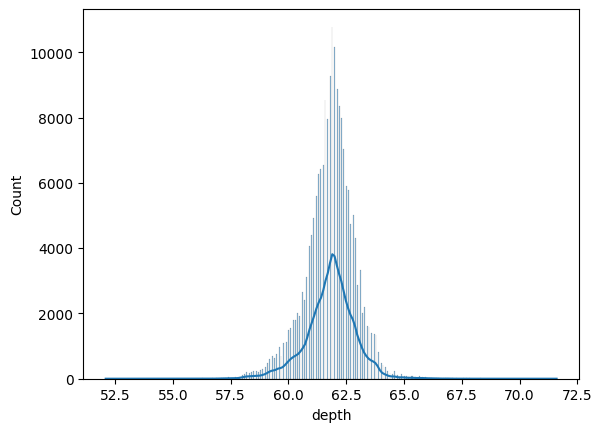

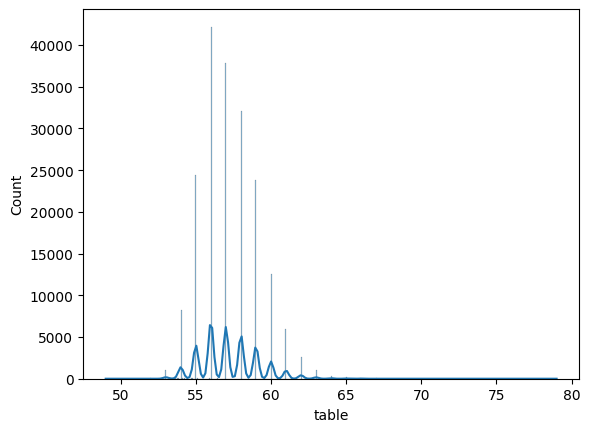

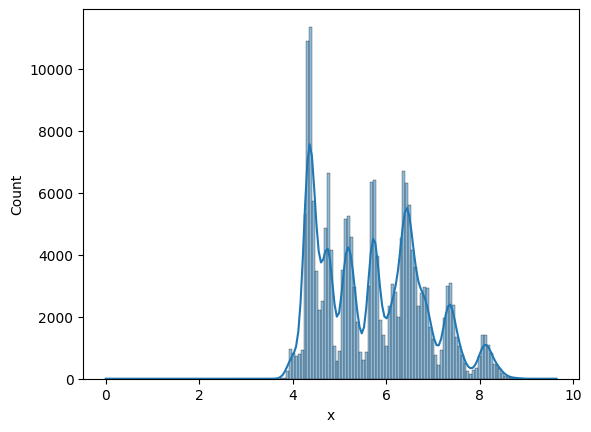

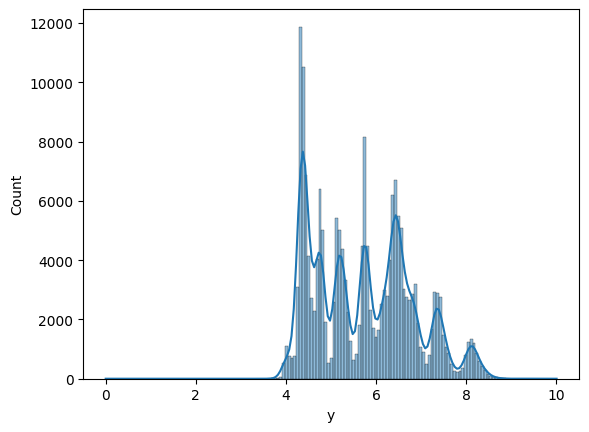

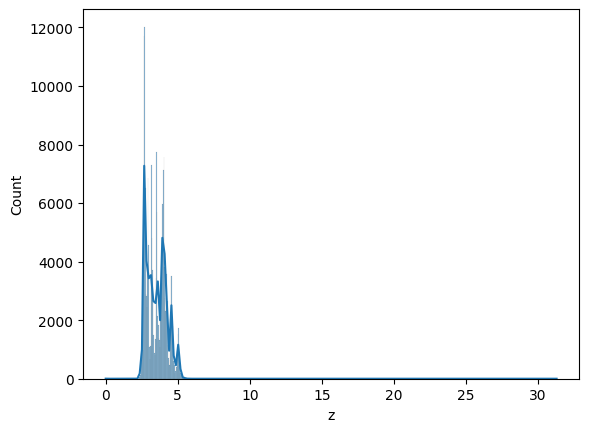

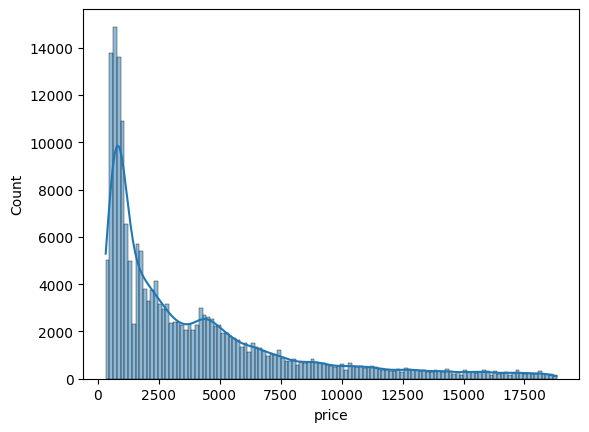

In [19]:
plt.figure(figsize = (8,6))
x = 0
for i in numerical:
    sns.histplot(data=df, x=i, kde= True)
    plt.show()

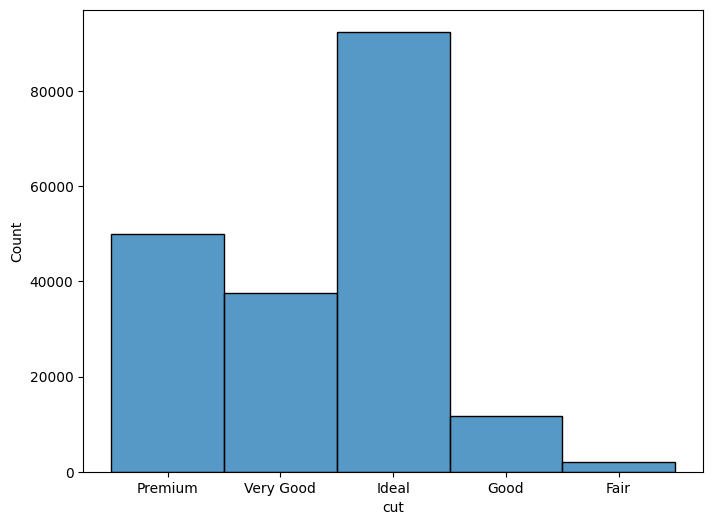

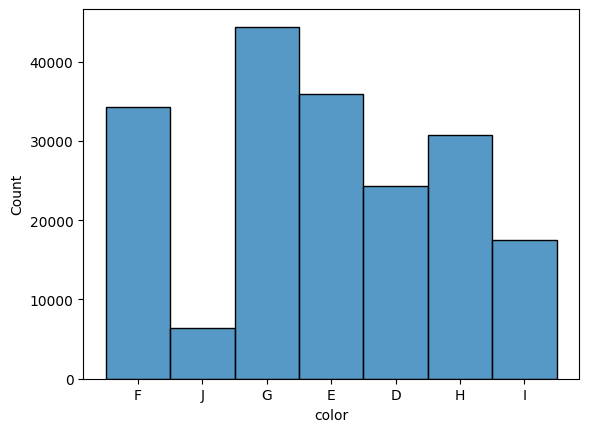

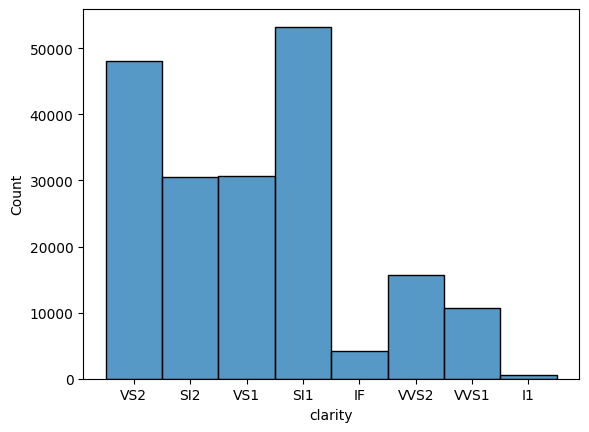

In [20]:
x = 0
plt.figure(figsize= (8,6))
for i in category:
    sns.histplot(data = df, x = i)
    plt.show()


<Axes: >

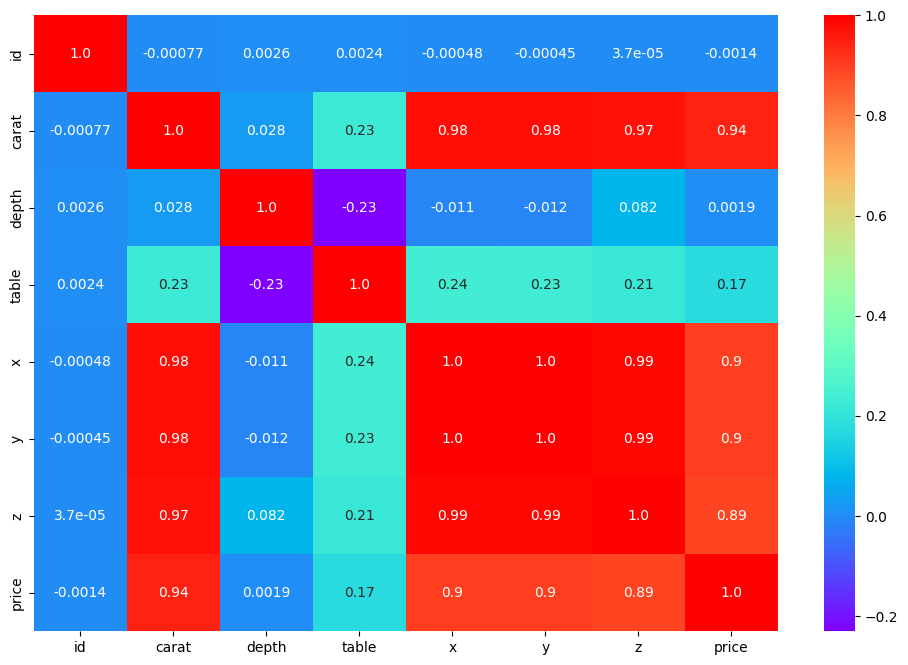

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(df[numerical].corr(), annot = True, cmap = 'rainbow', fmt = '0.2',cbar = True)

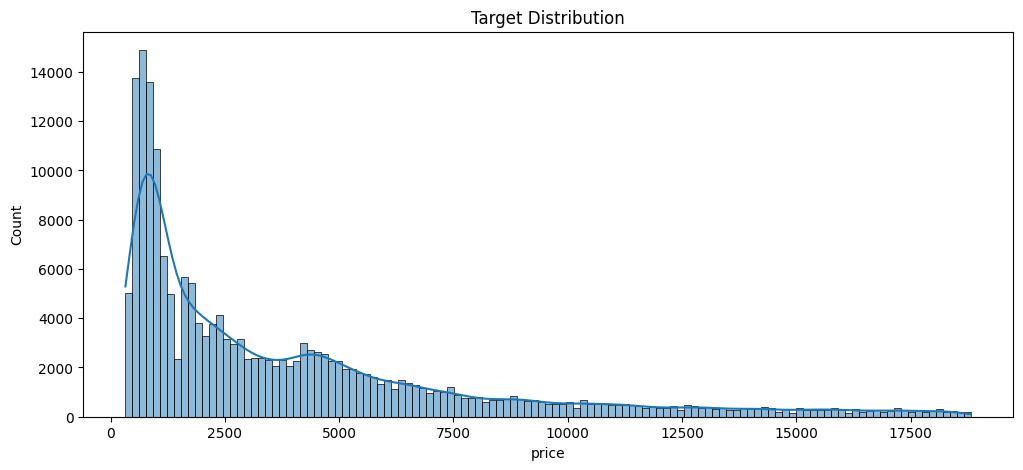

In [22]:
#Price Frequency
plt.figure(figsize= (12,5))
sns.histplot(data= df, x= "price", kde= True)
plt.title("Target Distribution")
plt.show()

In [23]:
#df['cut'].value_counts()

cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}

In [24]:
#df['clarity'].unique()
clarity_map={"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}

In [25]:
color_map={"D":1,"E":2,"F":3,"G":4,"H":5,"I":6,"J":7}

In [26]:
df['cut']=df['cut'].map(cut_map)
df['clarity']=df['clarity'].map(clarity_map)
df['color']=df['color'].map(color_map)

In [27]:
df.shape

(193573, 11)

In [28]:
df.head(5)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453


In [29]:
df.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [30]:
df.drop(['clarity','color','cut'],axis=1,inplace=True)

In [31]:
df.shape

(193573, 8)

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [33]:
X = df.drop(labels = ['price'], axis=1)
Y = df[['price']]

In [34]:
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

In [35]:
categorical_cols

Index([], dtype='object')

In [36]:
numerical_cols

Index(['id', 'carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [37]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [38]:
num_pipeline=Pipeline(
steps=[('imputer',SimpleImputer(strategy='median')),
       ('scaler',StandardScaler())]
)

In [39]:
preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols)])
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['id', 'carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object'))])

In [40]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=30)

In [41]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [42]:
X_train.head()

,num_pipeline__id,num_pipeline__carat,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z
0,1.274919,-0.975439,-0.849607,-0.121531,-1.042757,-1.080970,-1.123150
1,-1.102907,0.235195,1.833637,-0.121531,0.318447,0.279859,0.485354
2,-0.997613,0.494617,0.815855,0.399800,0.570855,0.606458,0.673737
3,-1.173764,-1.018676,0.260701,0.921131,-1.214034,-1.244270,-1.195605
4,-0.914812,-0.953821,-0.664555,-0.642862,-1.069801,-1.044681,-1.094168


In [43]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [44]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [45]:
regression.coef_

array([[ 1.89175074e-01,  6.49855868e+03, -2.42306681e+02,
        -1.79639469e+02, -2.20364015e+03, -4.64013780e+02,
        -3.11325335e+01]])

In [46]:
regression.intercept_

array([3970.76628955])

In [47]:
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [48]:
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet()
}
trained_model_list=[]
model_list=[]
r2_list=[]

In [49]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)
    print((y_pred.mean()))

    mae, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')

3958.038372012122
LinearRegression
Model Training Performance
RMSE: 1216.846755866942
MAE: 721.2570733969109
R2 score 90.90987196192076


3958.0066718619087
Lasso
Model Training Performance
RMSE: 1216.7513079944488
MAE: 723.3059474236928
R2 score 90.91129794156811


3958.0385078229133
Ridge
Model Training Performance
RMSE: 1216.84851142153
MAE: 721.2895130795503
R2 score 90.90984573310038


3957.4652628997083
Elasticnet
Model Training Performance
RMSE: 1638.9392145557538
MAE: 1140.6453353113648
R2 score 83.50987618505323




In [50]:
y_pred

array([ 2395.38106837,  3706.36446214,   -47.92911178, ...,
        3824.73916333,  1164.9790654 , 11383.26486894])

In [51]:
model_list

['LinearRegression', 'Lasso', 'Ridge', 'Elasticnet']